# Assignment 2

In [2]:
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(GGally)
library(AER)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: car

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Loading required package: lmtest

Loading required package: zoo


A

Demonstrate that the dataset can be read from the web into R.

In [3]:
data <- read.csv(url("https://raw.githubusercontent.com/SiyingLiu03/GroupProjectSTAT301/main/HR-Employee-Attrition.csv"))
head(data)

Age Attrition BusinessTravel    DailyRate Department            
1 41  Yes       Travel_Rarely     1102      Sales                 
2 49  No        Travel_Frequently  279      Research & Development
3 37  Yes       Travel_Rarely     1373      Research & Development
4 33  No        Travel_Frequently 1392      Research & Development
5 27  No        Travel_Rarely      591      Research & Development
6 32  No        Travel_Frequently 1005      Research & Development
  DistanceFromHome Education EducationField EmployeeCount EmployeeNumber ⋯
1 1                2         Life Sciences  1             1              ⋯
2 8                1         Life Sciences  1             2              ⋯
3 2                2         Other          1             4              ⋯
4 3                4         Life Sciences  1             5              ⋯
5 2                1         Medical        1             7              ⋯
6 2                2         Life Sciences  1             8              ⋯
  RelationshipSatisfaction StandardHours StockOptionLevel TotalWorkingYears
1 1                        80            0                 8               
2 4                        80            1                10               
3 2                        80            0                 7               
4 3                        80            0                 8               
5 4                        80            1                 6               
6 3                        80            0                 8               
  TrainingTimesLastYear WorkLifeBalance YearsAtCompany YearsInCurrentRole
1 0                     1                6             4                 
2 3                     3               10             7                 
3 3                     3                0             0                 
4 3                     3                8             7                 
5 3                     3                2             2                 
6 2                     2                7             7                 
  YearsSinceLastPromotion YearsWithCurrManager
1 0                       5                   
2 1                       7                   
3 0                       0                   
4 3                       0                   
5 2                       2                   
6 3                       6

The dataset contains the information about every employees, such as their personal information and information about their status in the company. The focus of dataset is the attrition status and can be used to help HR to decide to retain this employee or not. There are 1470 observations in the dataset and 35 variables. Below is the description of dataset。

|Variable |Type |Description |
|---------|-----|------------|
|Age      |continuous  |Age of Employee|
|Attrition| categorical|If the employee has been quited or some other reason|
|BusinessTravel| categorical| Rate of business travel|
|DailyRate| continuous| Amount of pay per day|
|Department|categorical| Department of employee|
|DistanceFromHome| continuous| Distance from home to work in miles|
|Education|categorical| Education level|
|EducationField| categorical| Field of study|
|EmployeeCount| continuous| Count of employee|
|EmployeeNumber| categorical | Employee number|
|EnvironmentSatisfaction|categorical|Employee satisfaction(from 1 to 4) at work|
|Gender| categorical | gender of employee|
|HourlyRate|continuous|employee hourly rate|
|JobInvolvement| categorical| Level of involvment|
|JobLevel|categorical|Level of senority|
|JobRole| categorical|Employee's role in the company|
|JobSatisfaction|categorical|Satisfaction of employee|
|MaritalStatus|categorical|Marital Status of employee|
|MonthlyIncome|continuous|Monthly income of an employee|
|MonthlyRate|continuous|Monthly rate of an employee|
|NumCompaniesWorked|continuous|Number of companies that employee has worked at before|
|Over18|categorical|Employee is over 18 or not|
|OverTime|categorical|Whether the employee works overtime|
|PercentSalaryHike|continuous|Percent of salary hike|
|PerformanceRating|categorical|performance rate|
|RelationshipSatisfaction|categorical|satisfaction of relationship |
|StandardHours|continuous| per week standard work hours|
|StockOptionLevel|categorical| company stock option level|
|TotalWorkingYears| continuous| total working years|
|TrainingTimesLastYear|continuous|training time|
|WorkLifeBalance|categorical|balance between work and life|
|YearAtCompany|continuous|total years at current company|
|YearsInCurrentRole| continuous| total years in current role|
|YearsSinceLastPromotion|continuous|number of years since last promotion|
|YearsWithCurrManager| continuous|Years working under the current manager|

Question: How is attrition (as our response variable) affected by the explanatary variables: Age,Education,EducationField, DailyRate,
              Gender, OverTime, 
               PerformanceRating, YearsAtCompany, YearsSinceLastPromotion
               
The question will be focused on prediction (select a model that can predict the attrition status).

## Data Cleaning

Clean and wrangle the data into a tidy format.

In [39]:
# Convert the categorical variables in the dataset into factors
data$Attrition <- factor(data$Attrition)
data$BusinessTravel <- factor(data$BusinessTravel)
data$Department <- factor(data$Department)
data$EducationField <- factor(data$EducationField)
data$EmployeeCount <- factor(data$EmployeeCount)
data$EnvironmentSatisfaction <- factor(data$EnvironmentSatisfaction)
data$Gender <- factor(data$Gender)
data$Education <- factor(data$Education)
data$JobInvolvement <- factor(data$JobInvolvement)
data$JobLevel <- factor(data$JobLevel)
data$PerformanceRating <- factor(data$PerformanceRating)
data$JobRole <- factor(data$JobRole)
data$JobSatisfaction <- factor(data$JobSatisfaction)
data$MaritalStatus <- factor(data$MaritalStatus)
data$Over18 <- factor(data$Over18)
data$OverTime <- factor(data$OverTime)
data$RelationshipSatisfaction <- factor(data$RelationshipSatisfaction)
data$StockOptionLevel <- factor(data$StockOptionLevel)
data$WorkLifeBalance <- factor(data$WorkLifeBalance)

head(data)

Age Attrition BusinessTravel    DailyRate Department            
1 41  Yes       Travel_Rarely     1102      Sales                 
2 49  No        Travel_Frequently  279      Research & Development
3 37  Yes       Travel_Rarely     1373      Research & Development
4 33  No        Travel_Frequently 1392      Research & Development
5 27  No        Travel_Rarely      591      Research & Development
6 32  No        Travel_Frequently 1005      Research & Development
  DistanceFromHome Education EducationField EmployeeCount EmployeeNumber ⋯
1 1                2         Life Sciences  1             1              ⋯
2 8                1         Life Sciences  1             2              ⋯
3 2                2         Other          1             4              ⋯
4 3                4         Life Sciences  1             5              ⋯
5 2                1         Medical        1             7              ⋯
6 2                2         Life Sciences  1             8              ⋯
  RelationshipSatisfaction StandardHours StockOptionLevel TotalWorkingYears
1 1                        80            0                 8               
2 4                        80            1                10               
3 2                        80            0                 7               
4 3                        80            0                 8               
5 4                        80            1                 6               
6 3                        80            0                 8               
  TrainingTimesLastYear WorkLifeBalance YearsAtCompany YearsInCurrentRole
1 0                     1                6             4                 
2 3                     3               10             7                 
3 3                     3                0             0                 
4 3                     3                8             7                 
5 3                     3                2             2                 
6 2                     2                7             7                 
  YearsSinceLastPromotion YearsWithCurrManager
1 0                       5                   
2 1                       7                   
3 0                       0                   
4 3                       0                   
5 2                       2                   
6 3                       6

In [40]:
#Remove rows with missing values
hrdata <- na.omit(data)

In [41]:
#Get the number of observations we have
n <- nrow(hrdata)
n

[1] 1470

In [42]:
# Get column names
column_names <- colnames(hrdata)
column_names

[1] "Age"                      "Attrition"               
 [3] "BusinessTravel"           "DailyRate"               
 [5] "Department"               "DistanceFromHome"        
 [7] "Education"                "EducationField"          
 [9] "EmployeeCount"            "EmployeeNumber"          
[11] "EnvironmentSatisfaction"  "Gender"                  
[13] "HourlyRate"               "JobInvolvement"          
[15] "JobLevel"                 "JobRole"                 
[17] "JobSatisfaction"          "MaritalStatus"           
[19] "MonthlyIncome"            "MonthlyRate"             
[21] "NumCompaniesWorked"       "Over18"                  
[23] "OverTime"                 "PercentSalaryHike"       
[25] "PerformanceRating"        "RelationshipSatisfaction"
[27] "StandardHours"            "StockOptionLevel"        
[29] "TotalWorkingYears"        "TrainingTimesLastYear"   
[31] "WorkLifeBalance"          "YearsAtCompany"          
[33] "YearsInCurrentRole"       "YearsSinceLastPromotion" 
[35] "YearsWithCurrManager"

Then, select the variables we are interested and change the names of columns.

In [43]:
hrdata <- hrdata |>
        select(Age,Attrition,Education,EducationField, DailyRate,
              Gender, OverTime, 
               PerformanceRating, YearsAtCompany, YearsSinceLastPromotion)
hrdata <- hrdata %>%
  rename(age = Age,
         attrition = Attrition,
         edu = Education,
         edufield = EducationField,
         daily = DailyRate,
         gender = Gender,
         overtime = OverTime,
         perrating = PerformanceRating,
         yratcom = YearsAtCompany,
         yrsincepromotion = YearsSinceLastPromotion
        )
head(hrdata)

age attrition edu edufield      daily gender overtime perrating yratcom
1 41  Yes       2   Life Sciences 1102  Female Yes      3          6     
2 49  No        1   Life Sciences  279  Male   No       4         10     
3 37  Yes       2   Other         1373  Male   Yes      3          0     
4 33  No        4   Life Sciences 1392  Female Yes      3          8     
5 27  No        1   Medical        591  Male   No       3          2     
6 32  No        2   Life Sciences 1005  Male   No       3          7     
  yrsincepromotion
1 0               
2 1               
3 0               
4 3               
5 2               
6 3

## Visualization

Propose a visualization that I consider relevant to address my question or to explore the data.

After we have a tidy data, we can visualize the dataset between variables.

We need to see that which variables are relevant and detect the potential problems in the model.

First, we see the variables that are potentially associated with the response variable (attrition).

To see if there is a difference or any correlation between age and attrition status, we make a boxplot to view.

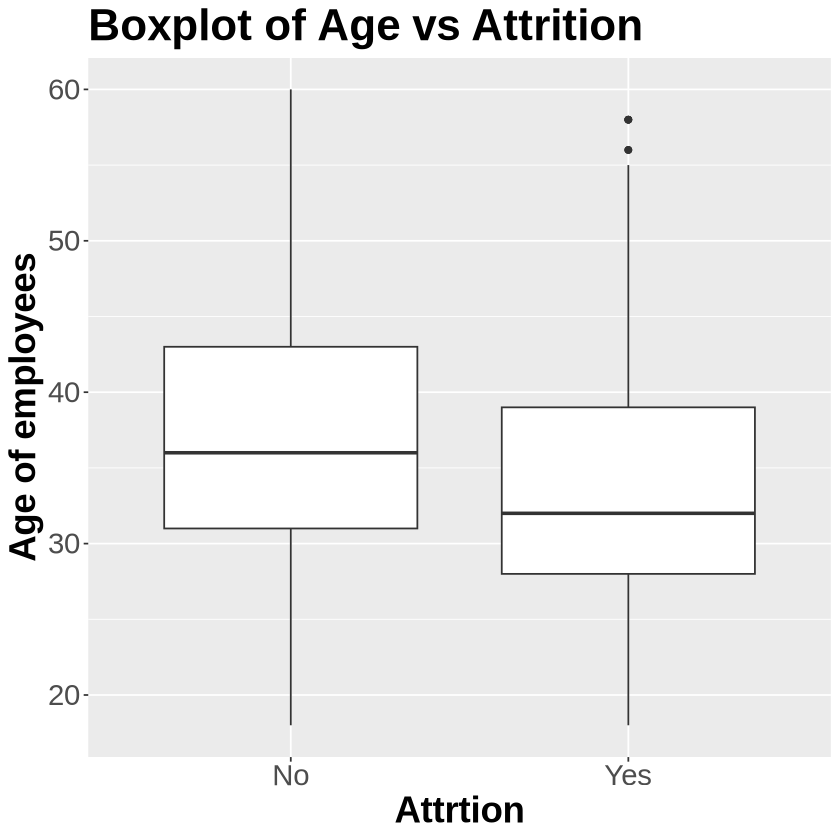

In [8]:
#Age vs Attrition
age_attrition_boxplots <- hrdata %>%
   ggplot() +
   geom_boxplot(aes(x = attrition, y = age)) +
   theme(
     text = element_text(size = 22),
     plot.title = element_text(face = "bold"),
     axis.title = element_text(face = "bold")
   ) +
   ggtitle("Boxplot of Age vs Attrition") +
   xlab("Attrtion") +
   ylab("Age of employees")
age_attrition_boxplots

The median of age of people with attrition is smaller than the people without attrition which may indicate that the company intends to keep their employees. And these two attrition status have similar range.

To view the count of each gender in people with attrition and without attrition

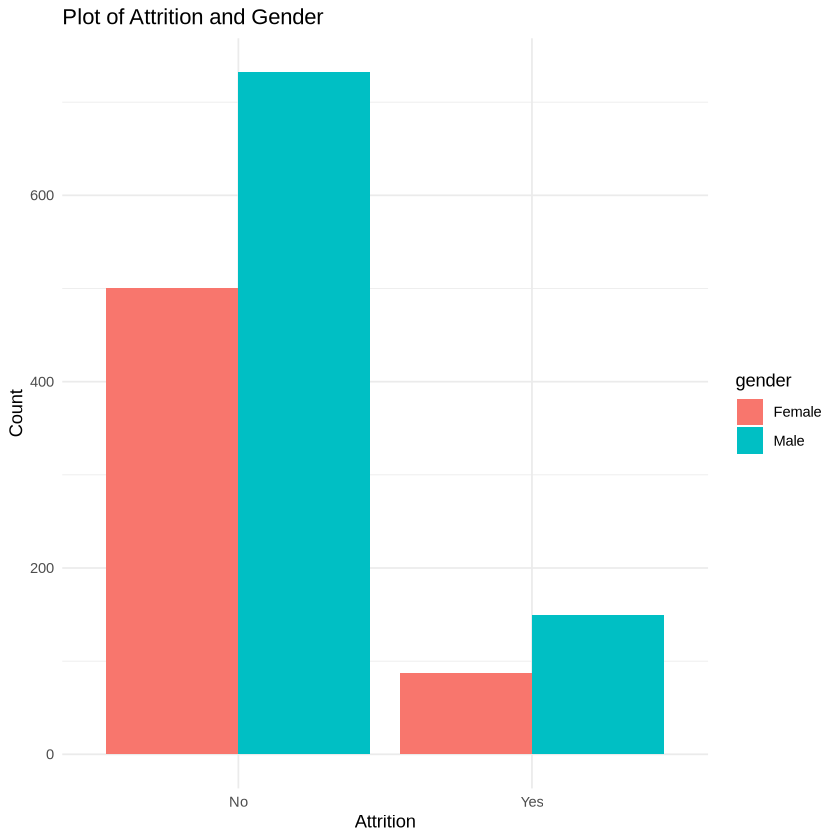

In [24]:
age_attrition_plot <- ggplot(hrdata, aes(x = attrition, fill = gender)) +
  geom_bar(position = 'dodge') +
  labs(title = 'Plot of Attrition and Gender', x = 'Attrition', y = 'Count') +
  theme_minimal()

age_attrition_plot

In both attrition status, male employees are more than female employees.

To view what the proportion of education level is in each attrition status 

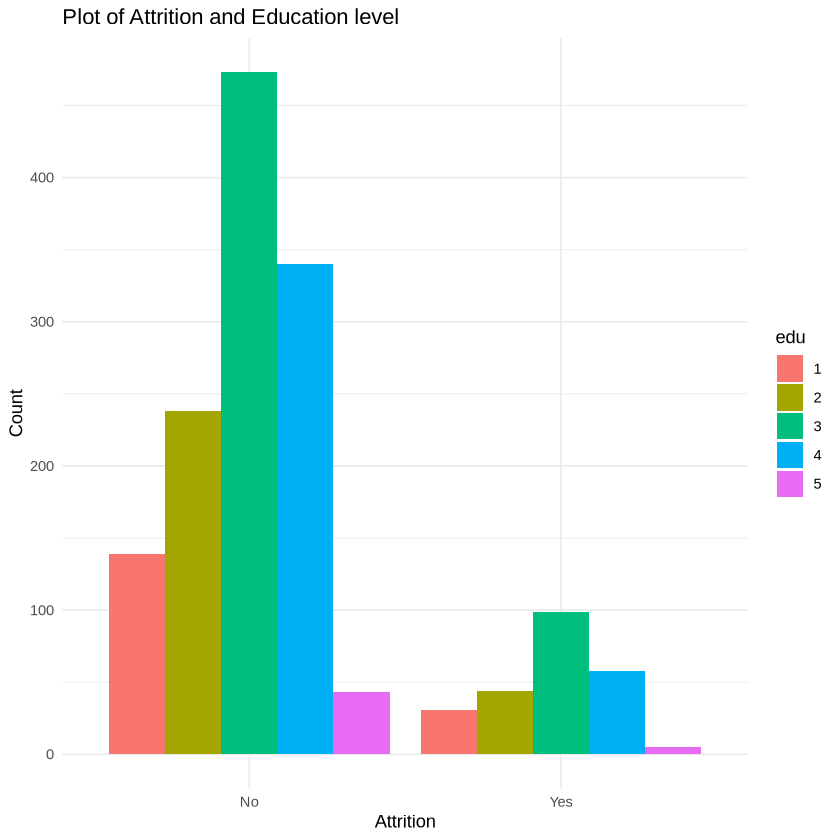

In [33]:
edu_attrition_plot <- ggplot(hrdata, aes(x = attrition, fill = edu)) +
  geom_bar(position = 'dodge') +
  labs(title = 'Plot of Attrition and Education level', x = 'Attrition', y = 'Count') +
  theme_minimal()

edu_attrition_plot

It can be told from the plot that the company perfers employee with education level 3. And both graphs have similar distribution.

To view what the proportion of education field is in each attrition status

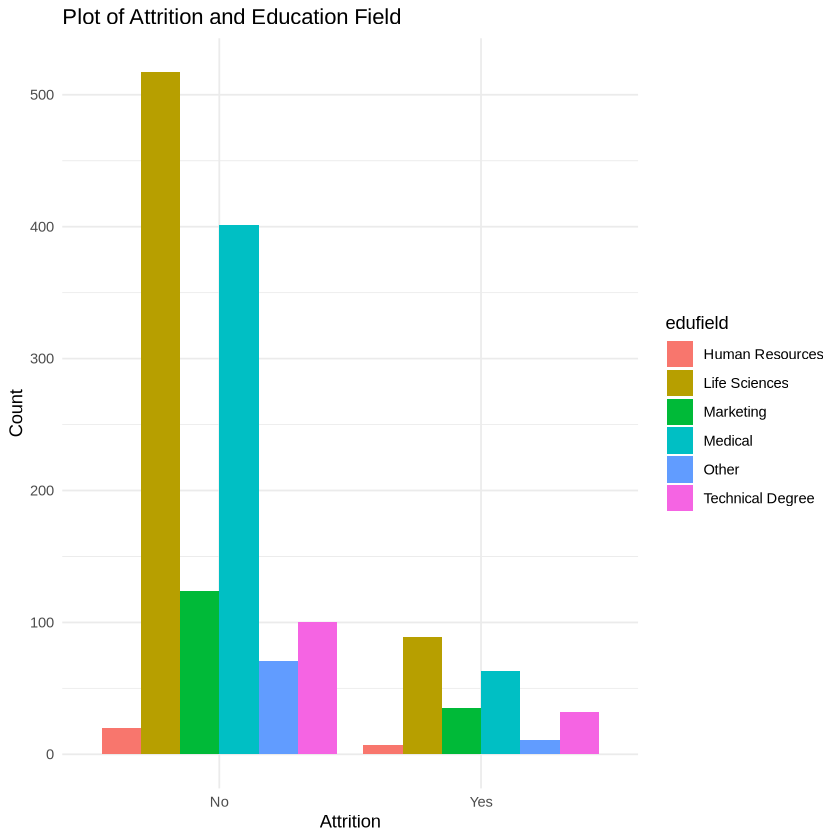

In [34]:
edufield_attrition_plot <- ggplot(hrdata, aes(x = attrition, fill = edufield)) +
  geom_bar(position = 'dodge') +
  labs(title = 'Plot of Attrition and Education Field', x = 'Attrition', y = 'Count') +
  theme_minimal()

edufield_attrition_plot

The company perfers to keep employees that are in life science field and marketing area.

To visualize the overTime variable and attrition status.

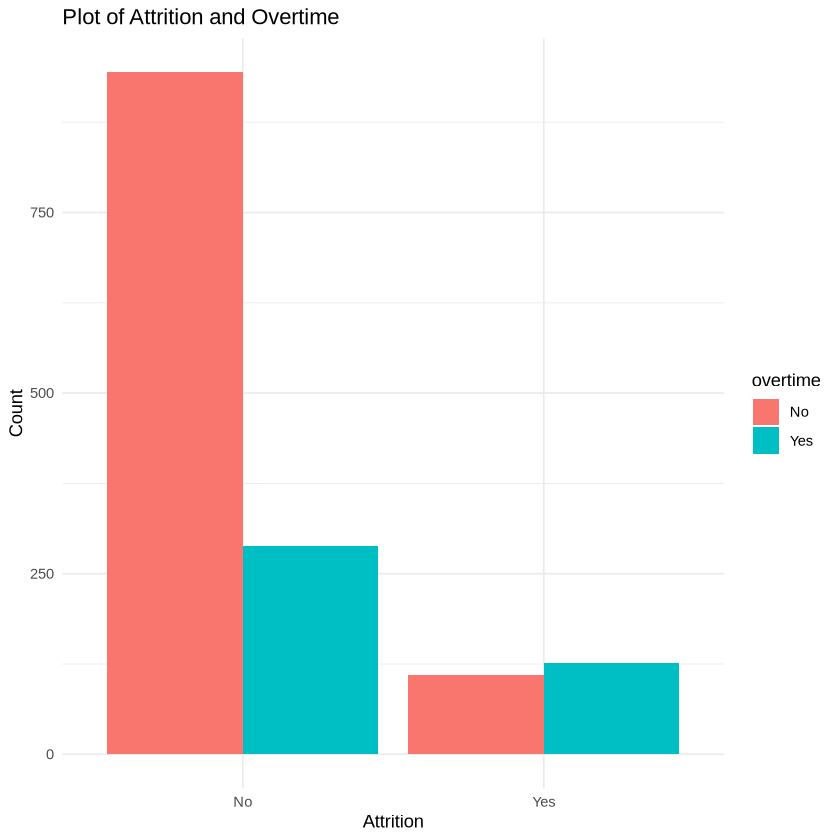

In [36]:
overTime_attrition_plot <- ggplot(hrdata, aes(x = attrition, fill = overtime)) +
  geom_bar(position = 'dodge') +
  labs(title = 'Plot of Attrition and Overtime', x = 'Attrition', y = 'Count') +
  theme_minimal()

overTime_attrition_plot


It can be seen that employees with attrition have more overtime than the people with no attrition, which maybe is a reason that they leave the company.

To view the daily rate and attrition status, we make a boxplot.

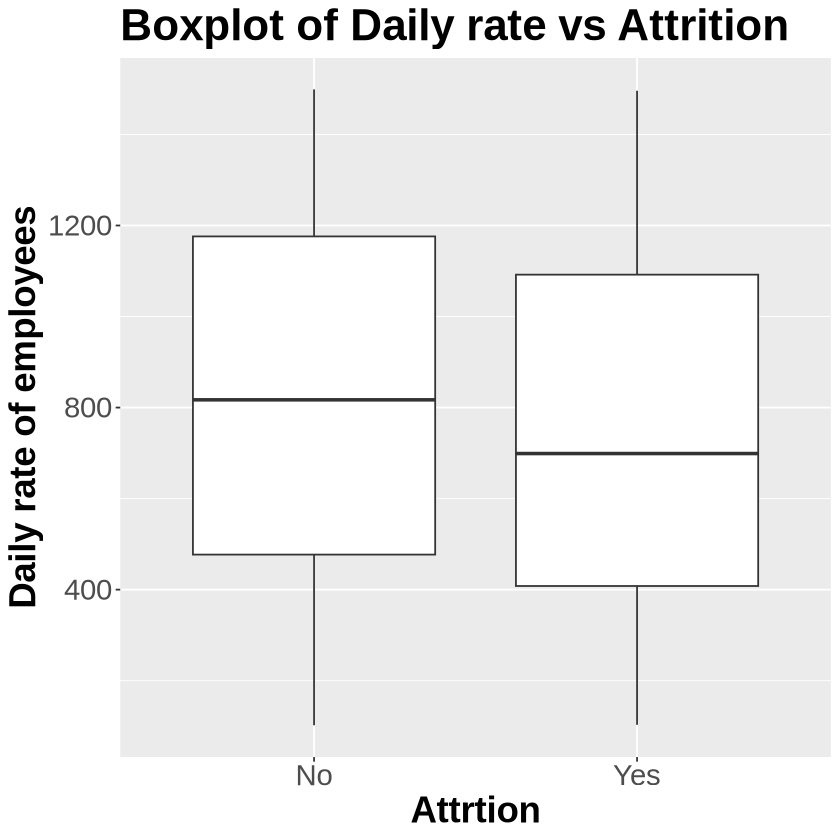

In [10]:
daily_attrition_boxplots <- hrdata %>%
   ggplot() +
   geom_boxplot(aes(x = attrition, y = daily)) +
   theme(
     text = element_text(size = 22),
     plot.title = element_text(face = "bold"),
     axis.title = element_text(face = "bold")
   ) +
   ggtitle("Boxplot of Daily rate vs Attrition") +
   xlab("Attrtion") +
   ylab("Daily rate of employees")
daily_attrition_boxplots


The two groups of attrition have similar daily rate.

To view the work years in company variable and attrition status, we make a boxplot to see if there is a difference between the people with attrition and without it.

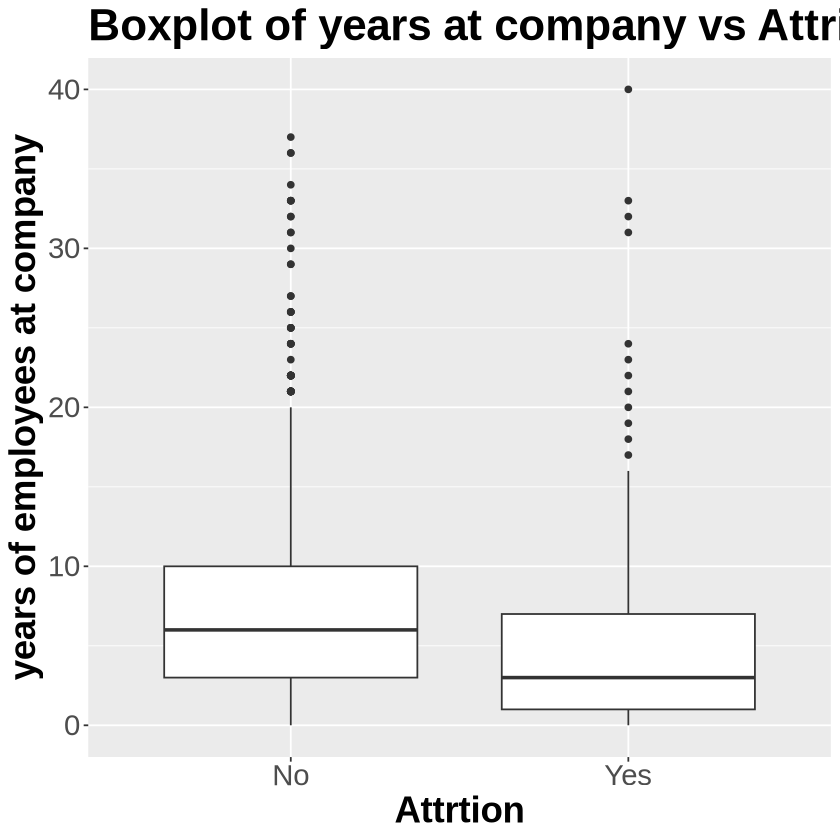

In [38]:
yratcom_attrition_boxplots <- hrdata %>%
   ggplot() +
   geom_boxplot(aes(x = attrition, y = yratcom)) +
   theme(
     text = element_text(size = 22),
     plot.title = element_text(face = "bold"),
     axis.title = element_text(face = "bold")
   ) +
   ggtitle("Boxplot of years at company vs Attrition") +
   xlab("Attrtion") +
   ylab("years of employees at company")
yratcom_attrition_boxplots

From the boxplot, it can be seen that the company would like to keep the employee in a long term and whenever they realise this employee is not suitable for the company, the employee has to leave the company, which I think is a reason of low median of yes attrition.

Visualize the performance rating variable versus attrition

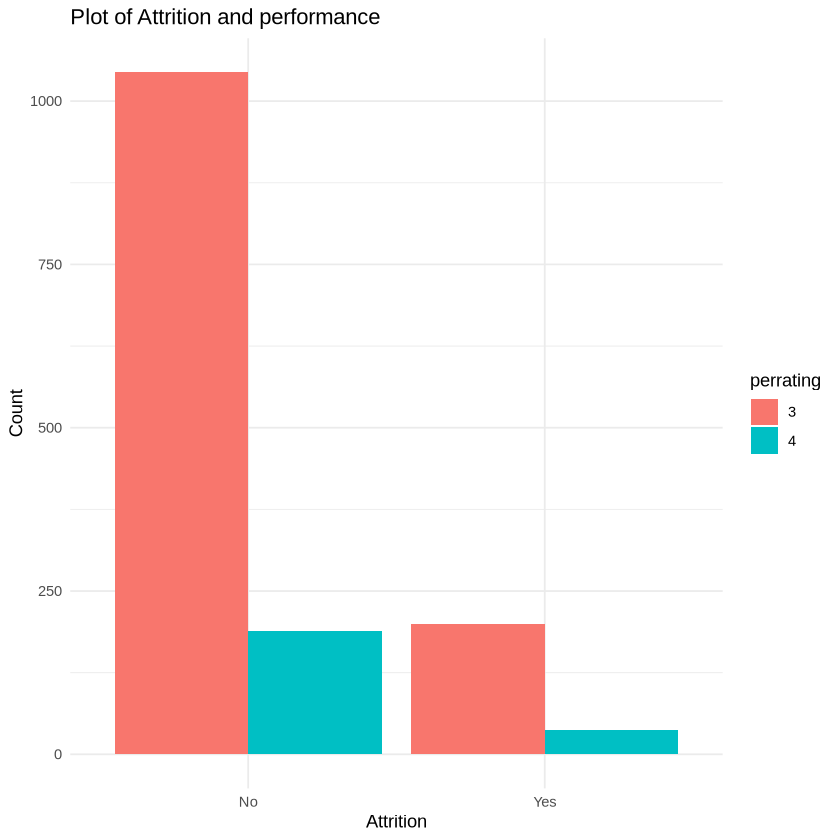

In [44]:
perrating_attrition_plot <- ggplot(hrdata, aes(x = attrition, fill = perrating)) +
  geom_bar(position = 'dodge') +
  labs(title = 'Plot of Attrition and performance ', x = 'Attrition', y = 'Count') +
  theme_minimal()

perrating_attrition_plot

Visualize the year since last promotion variable versus attrition

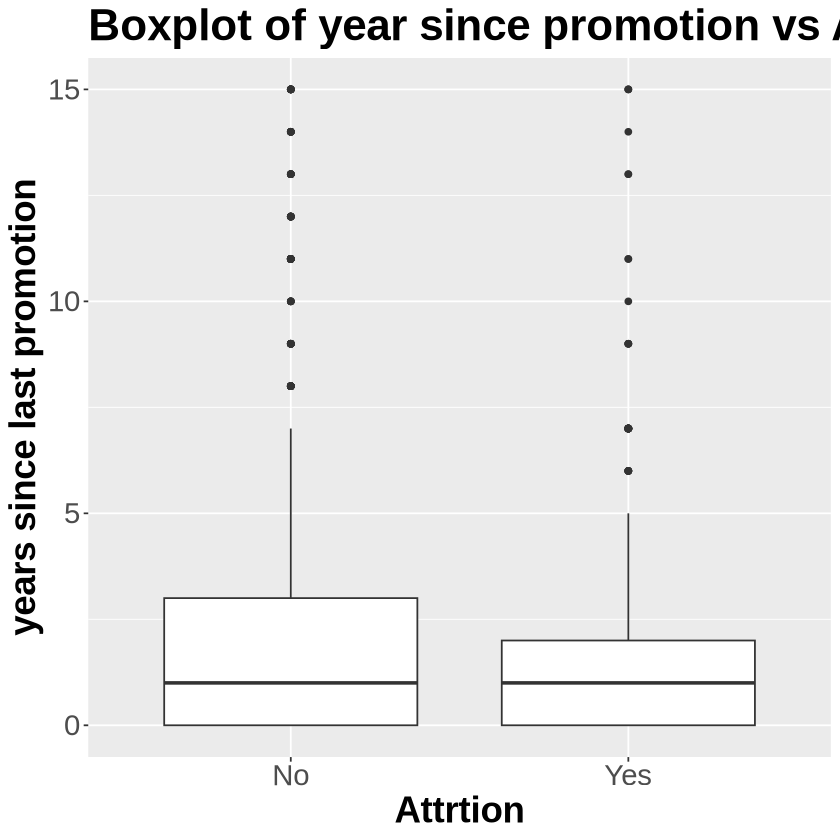

In [47]:
yrsincepromotion_attrition_boxplots <- hrdata %>%
   ggplot() +
   geom_boxplot(aes(x = attrition, y = yrsincepromotion)) +
   theme(
     text = element_text(size = 22),
     plot.title = element_text(face = "bold"),
     axis.title = element_text(face = "bold")
   ) +
   ggtitle("Boxplot of year since promotion vs Attrition") +
   xlab("Attrtion") +
   ylab("years since last promotion")
yrsincepromotion_attrition_boxplots

Two groups have similar numeber of years since last promotion.

To see is there any correlation between work years variable and years in current role variable, we make a scatter plot filled by attrition. Based on this, we can know that how the work years in the company and years in current role affect the attrition status, such as an employee leaves the company because they have worked in the company for a long time but still in a same position for a long time.

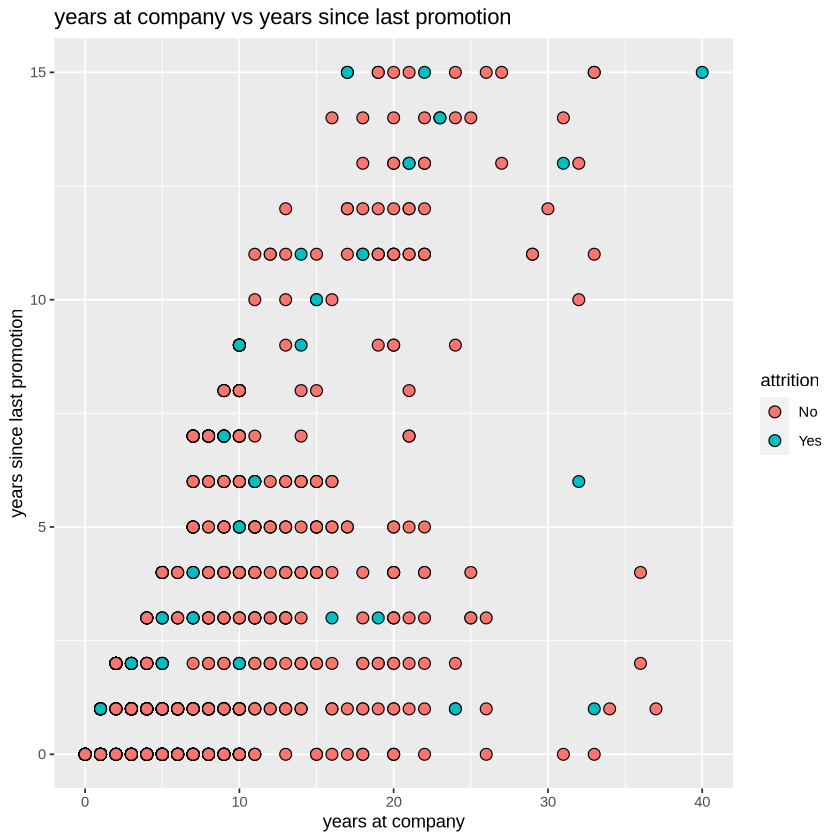

In [53]:
ggplot(hrdata, aes(x = yratcom, y = yrsincepromotion, fill = attrition)) +
  geom_point(shape = 21, size = 3) +  # Use shape 21 for filled circles
  labs(title = "years at company vs years since last promotion", x = "years at company", y = "years since last promotion")

Since we need to consider about multicollinearity, I make a correlation ggpair graph and a correlation matrix to visualize and analyse it.

Explore the correlation between numerical variables.

var1  var2             corr      
1 age   age              1.00000000
2 age   daily            0.01066094
3 age   yratcom          0.31130877
4 age   yrsincepromotion 0.21651337
5 daily age              0.01066094
6 daily daily            1.00000000

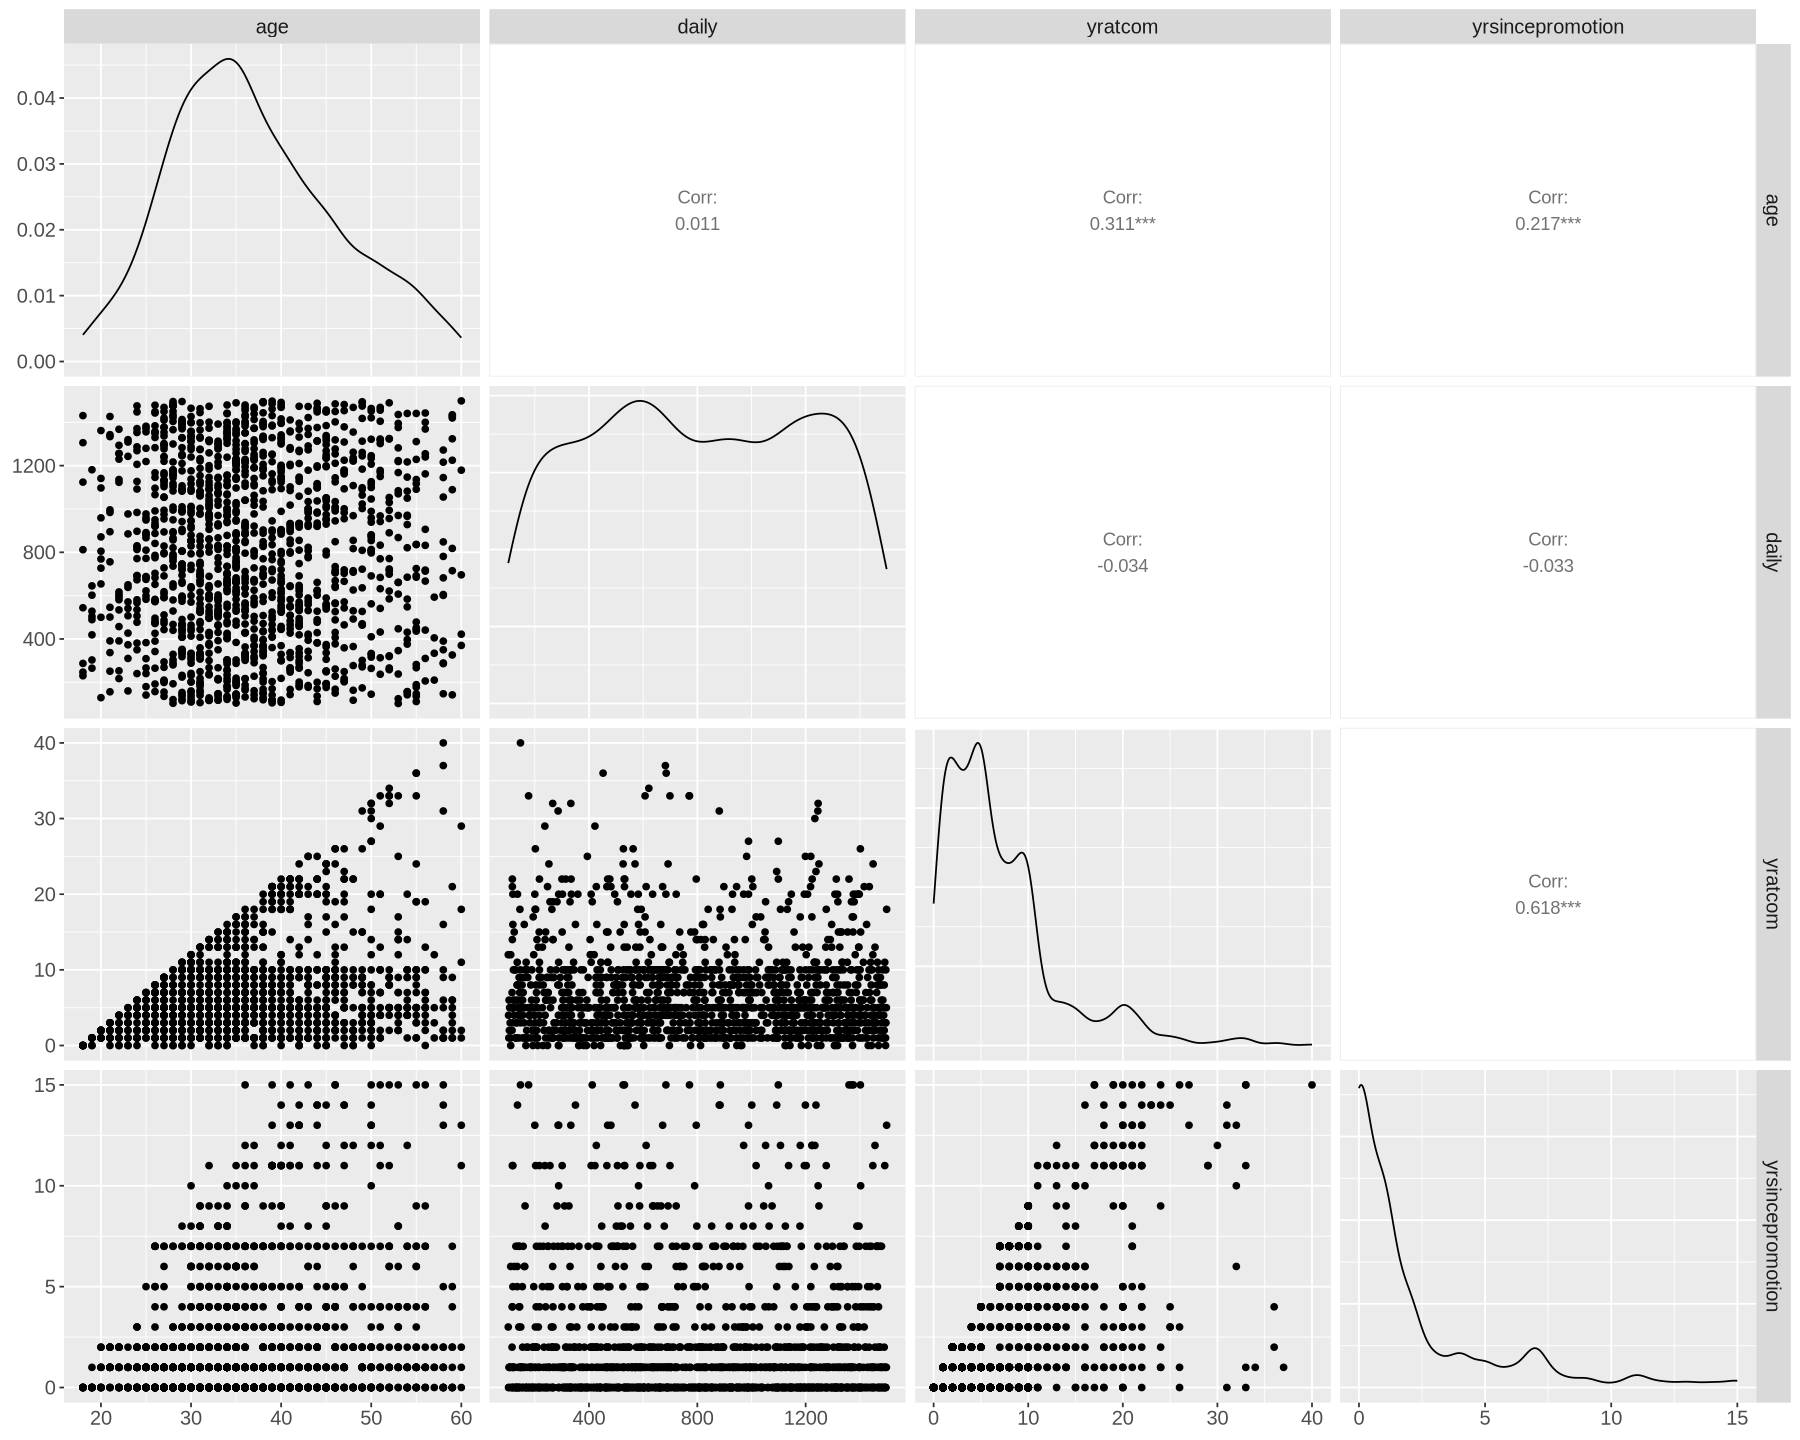

In [54]:
options(repr.plot.width = 15, repr.plot.height = 12)
num_hrdata <- hrdata |> select(age,attrition,daily,yratcom,yrsincepromotion)

hrdata_pair_plots <- num_hrdata %>%
   select(- attrition) %>% 
   ggpairs(progress = FALSE) +
   theme(
     text = element_text(size = 15),
     plot.title = element_text(face = "bold"),
     axis.title = element_text(face = "bold")
   )
 hrdata_pair_plots

corr_matrix_HRdata <- num_hrdata %>%
   select(- attrition) %>% 
   cor() %>%
   as.data.frame() %>%
   rownames_to_column("var1") %>%
   pivot_longer(-var1, names_to = "var2", values_to = "corr")
 head(corr_matrix_HRdata)

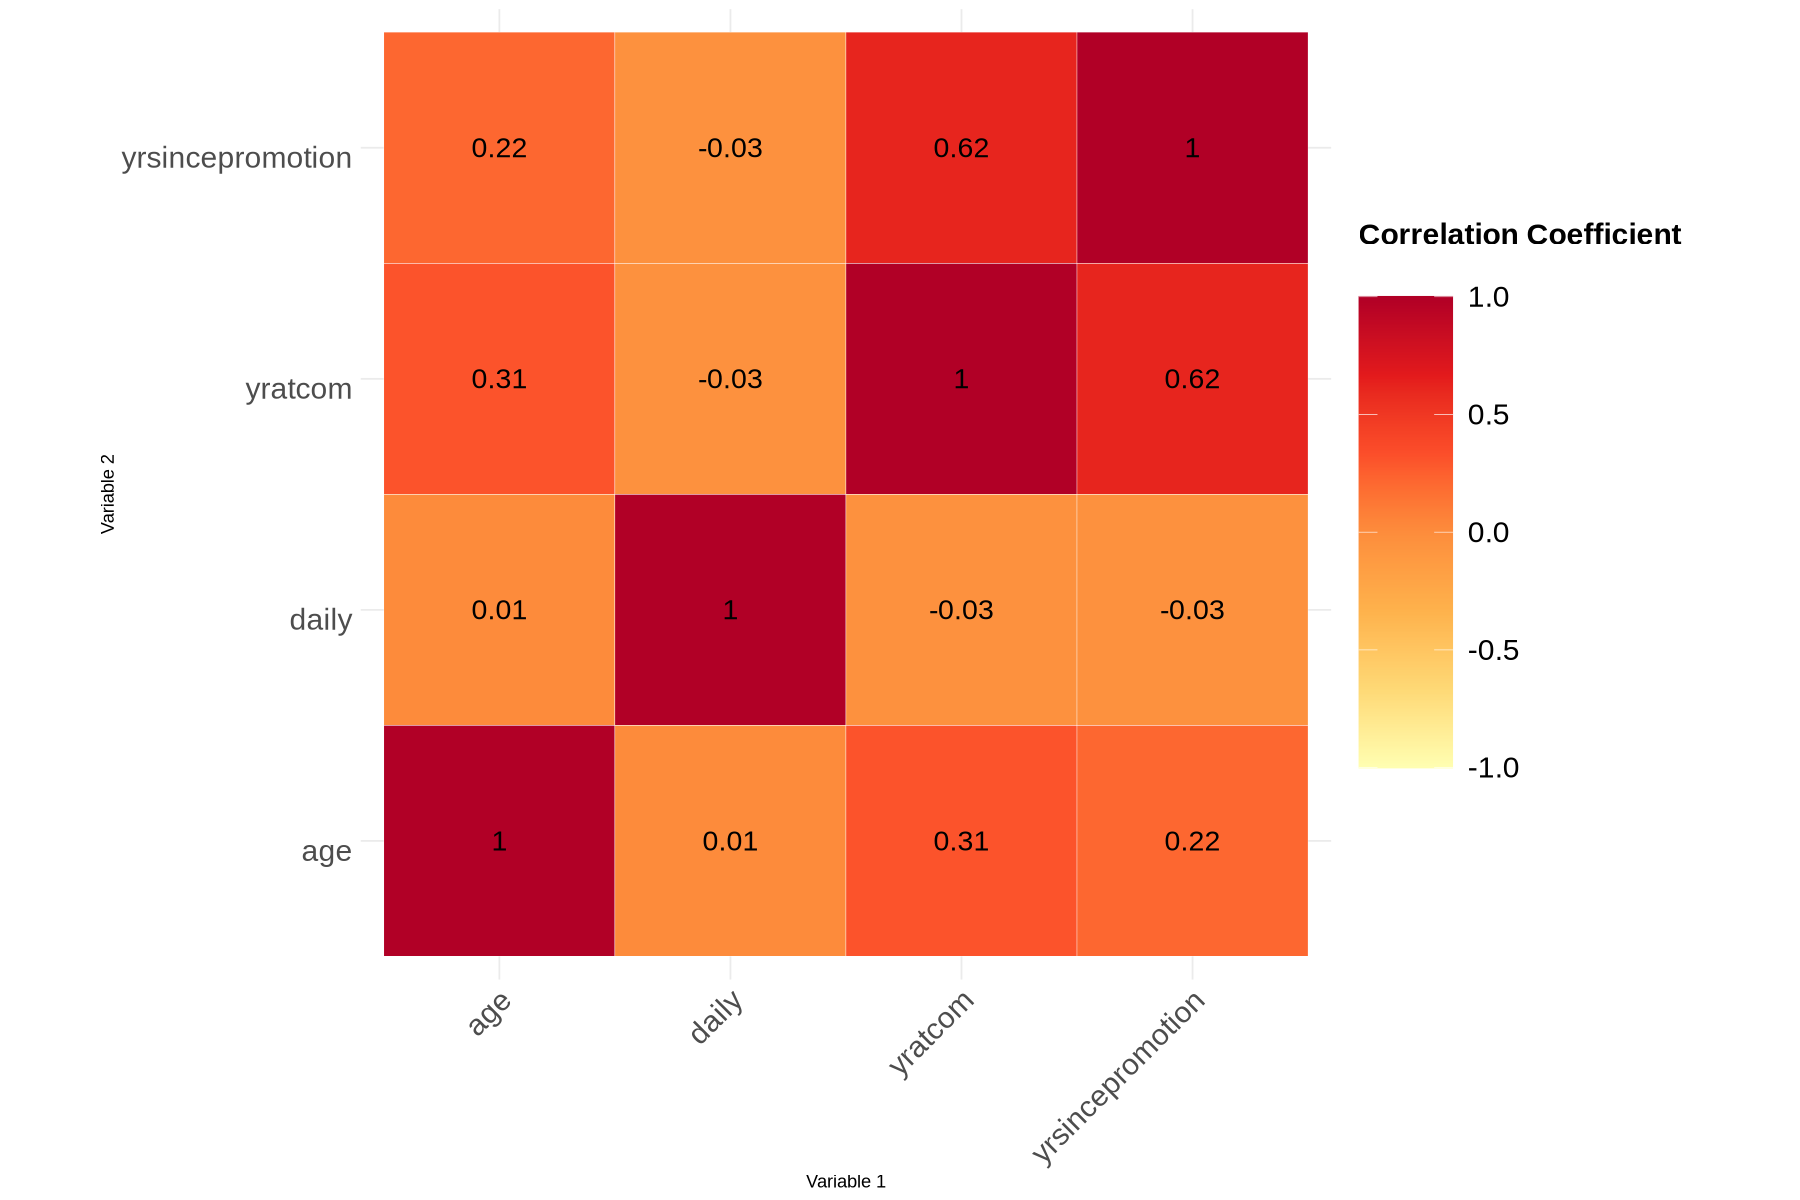

In [56]:
# Based on the given table, we conduct a correlation matrix.
options(repr.plot.width = 15, repr.plot.height = 10)

 plot_corr_matrix_HRdata<- corr_matrix_HRdata %>%
   ggplot(aes(x = var1, y = var2)) +
   geom_tile(aes(fill = corr), color = "white") +
   scale_fill_distiller("Correlation Coefficient \n",
     palette =  "YlOrRd",
     direction = 1, limits = c(-1,1)
   ) +
   labs(x = "Variable 1", y = "Variable 2") +
   theme_minimal() +
   theme(
     axis.text.x = element_text(
       angle = 45, vjust = 1,
       size = 18, hjust = 1
     ),
     axis.text.y = element_text(
       vjust = 1,
       size = 18, hjust = 1
     ),
     legend.title = element_text(size = 18, face = "bold"),
     legend.text = element_text(size = 18),
     legend.key.size = unit(2, "cm")
   ) +
   coord_fixed() +
   geom_text(aes(x = var1, y = var2, label = round(corr, 2)), color = "black", size = 6)
 plot_corr_matrix_HRdata

As you can see, there are several variables that have high correlation or multicollinearity which will be considered in the next step of  this project. It is also necessary to find out is there any correlation between dependent variable and independent variable, in order to determine which the confounders are. 